# Mercari Price Suggestion 

#### Description
It can be hard to know how much something’s really worth. Small details can mean big differences in pricing. For example, one of these sweaters cost 335 and the other cost 9.99. Can you guess which one’s which?

Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

Mercari, Japan’s biggest community-powered shopping app, knows this problem deeply. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

In this competition, Mercari’s challenging you to build an algorithm that automatically suggests the right product prices. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

## lets load the packages and data

In [1]:
# run this for plots and autoreload
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# packages
import numpy as np # math operation
import pandas as pd # data analysis and data frames
import matplotlib.pyplot as plt # ploting base package
import seaborn as sns #easy and advance ploting

In [3]:
pwd

'C:\\Users\\amogh'

In [4]:
# load the data 
PATH = 'D:/AMOGH/mercari/'
data = pd.read_table(PATH+'train.tsv',sep = '\t',low_memory=False)
data = data.sample(10000)


In [ ]:
data.shape

In [5]:
pd.set_option('display.max_colwidth', -1)

## look at the data


In [9]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1369906,1369906,1 by The Beatles CD,3,Electronics/Media/CD,NaN,10.0,1,Good condition. Released in 2000.
796135,796135,Handbook of Tropical Aquarium Fishes,3,Other/Books/Reference,NaN,11.0,1,Hardcover Book in Excellent condition. [rm] includes media mail shipping No shipping on Saturdays.
809636,809636,Fenty Bow Slides (Marshmallow),1,Women/Shoes/Sandals,PUMA,86.0,0,"New White (Marshmallow) Authentic (Security tag still attatched) UK 3/ US 5.5 Runs a size lg Fits up to a 7 Ships double boxed Includes dustbag Still have receipt Nothing wrong, I just bought 2 pair"
1290100,1290100,For Asan129 LP Elsa large,3,Women/Tops & Blouses/Blouse,Lilly Pulitzer,46.0,0,"Springy peach Lilly Pulitzer Elsa in great condition. No pulls, rips or stains. Only thing I notice is slight pucker on arm by armpit but the flowy sleeves make it unnoticeable. Dry cleaned-never washed."
1161650,1161650,Sports Bras,2,Women/Athletic Apparel/Sports Bras,NaN,14.0,0,All three are large.


In [12]:
# look at the bottom few columns
data.tail()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
9995,9995,Halloween nail stickers,1,Beauty/Makeup/Nails,NaN,3.0,1,New. Both sets included *please only purchase ...
9996,9996,NWT Wildfox Fringe Top XS Coachella,1,Women/Tops & Blouses/T-Shirts,Wildfox Couture,17.0,0,NWT Wildfox Coachella Fringe Top size XS. Mint...
9997,9997,Like New Baby Carrier,2,Kids/Gear/Backpacks & Carriers,Chicco,15.0,1,Excellent condition. No tears no stains used m...
9998,9998,Minecraft Creeper Scarf,1,Kids/Boys (4+)/Accessories,NaN,12.0,1,"A scarf is a trusty companion, covering your n..."
9999,9999,Michael Kors Swim Top,2,Women/Swimwear/One-Piece,Michael Kors,11.0,0,MICHAEL Michael Kors Halter Logo Tankini Top t...


In [14]:
# look at the dimention
data.shape

(10000, 8)

In [88]:
# lets look at the structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
train_id             10000 non-null int64
name                 10000 non-null object
item_condition_id    10000 non-null int64
category_name        9953 non-null object
brand_name           5739 non-null object
price                10000 non-null float64
shipping             10000 non-null int64
item_description     10000 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


## Missing values

In [ ]:
# we find missing values in category and brand_name column

In [16]:
# how many are missing 
data.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name          47
brand_name           4261
price                   0
shipping                0
item_description        0
dtype: int64

##  Statistics on numerical data 

In [60]:
# lets look at statistics for numerical data 
# describe gives information on numerical data types

data.describe()

,train_id,item_condition_id,price,shipping
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,7.381439e+05,1.897300,26.988200,0.444700
std,4.262620e+05,0.901351,35.352528,0.496957
min,1.640000e+02,1.000000,0.000000,0.000000
25%,3.700450e+05,1.000000,11.000000,0.000000
50%,7.393060e+05,2.000000,17.000000,0.000000
75%,1.105030e+06,3.000000,30.000000,1.000000
max,1.482382e+06,5.000000,806.000000,1.000000


#### My analysis from statistical analysis

In [ ]:
# my analysis from statistical analysis

1. We can see huge variation in price 
2. Shipping cost is almost divided equaly 

###  My hyphothesis

## Statistics on categorical variables

In [19]:
# lets look at statistics for categorical variables
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [20]:
data['item_condition_id'].value_counts()

1    4364
3    2916
2    2481
4     219
5      20
Name: item_condition_id, dtype: int64

In [21]:
data['shipping'].value_counts()

0    5461
1    4539
Name: shipping, dtype: int64

In [23]:
data['price'].value_counts().head()

10.0    691
12.0    551
14.0    491
9.0     453
16.0    452
Name: price, dtype: int64

In [53]:
count_name = data['name'].value_counts()

In [54]:
count_name.head()

Bundle               13
Kate Spade Wallet    5 
Necklace             5 
Boots                5 
Dress                5 
Name: name, dtype: int64

## Lets do visualizations and analyze the hypothesis

#### Lets do univariate analysis by visualizations

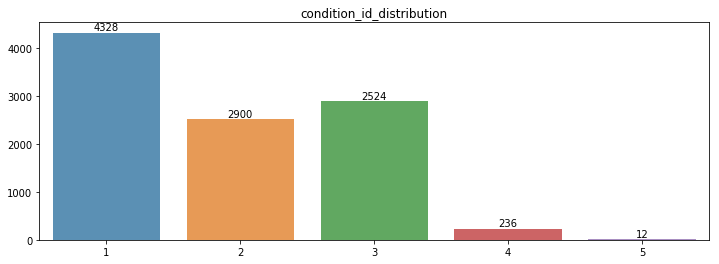

In [17]:

x=data['item_condition_id'].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("condition_id_distribution")

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')




Text(0.5,1,'Shipping_cost(1 or 0)')

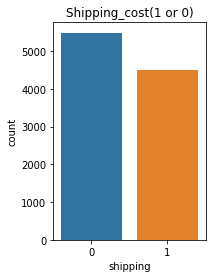

In [16]:
plt.subplot(1,2,2)
sns.countplot('shipping',data=data)
plt.title('Shipping_cost(1 or 0)')

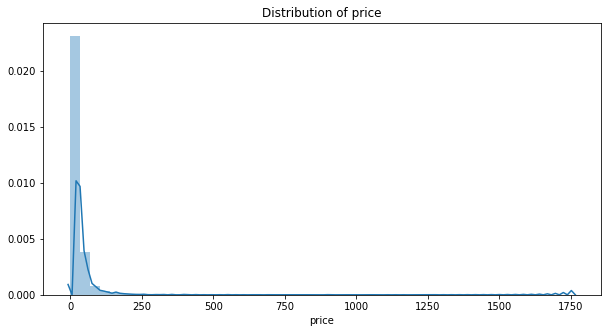

In [70]:
# Distribution of price
plt.figure(figsize=[10,5])
plt.title('Distribution of price')
sns.distplot(data['price'])


#### Bivariate analysis

In [ ]:
# I want to see interaction between price and item_condition_id

Text(0,0.5,'price')

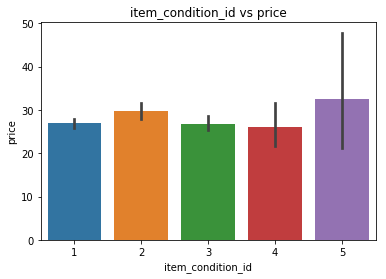

In [7]:
plt.title('item_condition_id vs price')
sns.barplot('item_condition_id','price',data=data)
plt.xlabel('item_condition_id')
plt.ylabel('price')

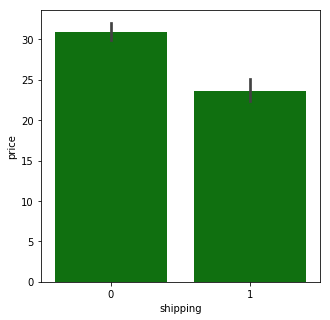

In [6]:
plt.figure(figsize=(5,5))
sns.barplot('shipping','price',data=data,color='green')

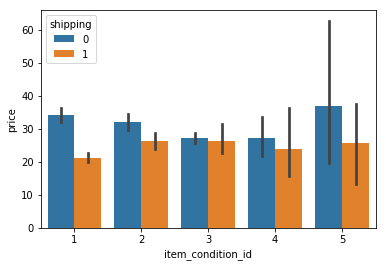

In [4]:
# there is over laping and there is a little effect of shipping
sns.barplot('item_condition_id','price',data=data,hue= 'shipping')

In [ ]:
# price vs brands

In [13]:
data_brand = data.groupby(by= 'brand_name').mean()

In [14]:
data_brand_price = data_brand.sort_values('price',ascending=False)

In [15]:
data_25 = data_brand_price[0:25]

In [16]:
index = data_25.index

Text(0,0.5,'brands')

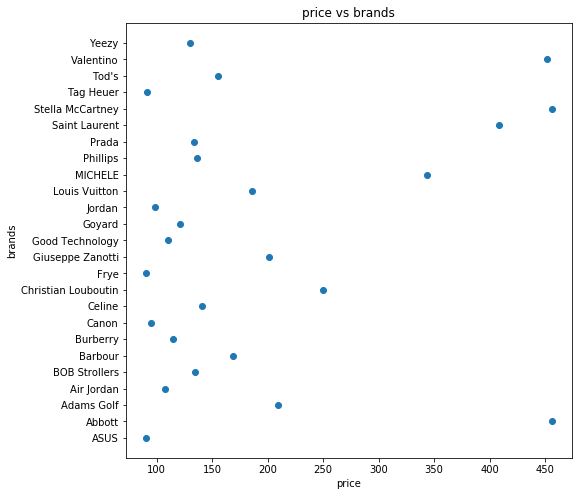

In [17]:
plt.figure(figsize=(8,8))
plt.title('price vs brands')
plt.scatter(x= 'price',y=index,data=data_25)
plt.xlabel('price')
plt.ylabel('brands')


In [ ]:
# price vs category_name

In [18]:
data_category = data.groupby(by= 'category_name').mean()

In [19]:
data_category_price = data_category.sort_values('price',ascending=False)

In [20]:
data_category_price_count = data_category_price[0:25]
index = data_category_price_count.index

Text(0,0.5,'category_name')

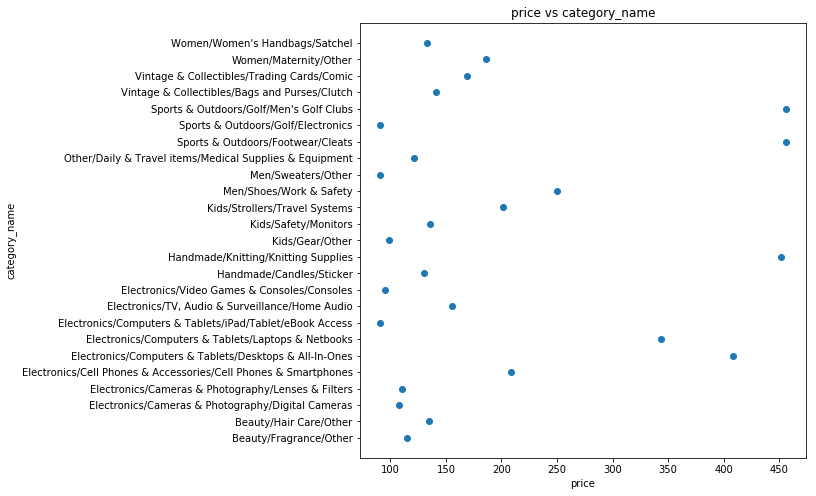

In [21]:
plt.figure(figsize=(8,8))
plt.title('price vs category_name')
plt.scatter(x= 'price',y=index,data=data_25)
plt.xlabel('price')
plt.ylabel('category_name')

#### Hypothesis review

In [ ]:
# From the analysis we get to know that we have a relationship between the price and category name and price and brand
# so my hypothesis is right there is an relationship between price and item_condition_id
# distribution of price is right skewed 


## Now lets fill in the missing vales by None for both the columns which has missing values

In [5]:
data['category_name'] = data['category_name'].fillna('None')
data['category_name'] = data['category_name'].astype(str).str.replace('/',',')
data['category_name'] = data['category_name'].str.lower()

In [6]:
data['category_name'].head(5)

1246848          electronics,video games & consoles,games
825060                                 men,shoes,athletic
38863         sports & outdoors,outdoors,hiking & camping
889005                        kids,girls 0-24 mos,dresses
694758     women,athletic apparel,pants, tights, leggings
Name: category_name, dtype: object

In [7]:
data['brand_name'].fillna('None',inplace = True)
data['brand_name'] = data['brand_name'].str.lower()

In [38]:
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#label.fit(data['brand_name'])

In [36]:
#label = LabelEncoder()
#label.fit(data['brand_name'])
#data['brand_name'] = label.transform(data['brand_name'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1417455 to 819157
Data columns (total 10 columns):
train_id                 10000 non-null int64
name                     10000 non-null object
item_condition_id        10000 non-null int64
category_name            10000 non-null object
brand_name               10000 non-null object
price                    10000 non-null float64
shipping                 10000 non-null int64
item_description         10000 non-null object
tag_name                 10000 non-null object
item_description_tags    10000 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


## Creating dummy variables

In [8]:
one_hot = pd.get_dummies(data['item_condition_id'])

In [9]:
one_ship = pd.get_dummies(data['shipping'])

## Text analysis

In [10]:
import nltk

In [11]:
import re  # regular expressions

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords = set(stopwords.words('english'))

In [14]:
#lda_x(lda,4)

In [15]:
#freq_dist = nltk.FreqDist(words)

In [16]:
#freq = pd.DataFrame.from_dict(freq_dist,orient='index')

In [17]:
#freq_greater_then_50 = freq[freq[0] > 100]

In [18]:
#index = freq_greater_then_50.index

In [19]:
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer


In [20]:
lemmentizer = WordNetLemmatizer()

## Text preprocessing

In [21]:
def train(name):
    
    text_name = nltk.Text(name)
    text_names = []
    for text in text_name:
        text_ = []
        text = text.lower()
        T = re.sub('rm','',text)
        text_.append(T)
        for i in text_:
            d = re.findall(r'[a-z0-9]+',i)
            text_names.append(' '.join(d))
            
            
            
            
    word_tokenize = []
    full_word_sent =[]
    from nltk import wordpunct_tokenize
    for sentence in text_names:
        words =[]
        for word in wordpunct_tokenize(sentence):
            word_tokenize.append(word)
            words.append(word)
        full_word_sent.append(words)
            
            
    
    words_token =[]
    words = []
    for sent in full_word_sent:
        word_token =[]
        for word in sent:
            if word not in stopwords:
                word_token.append(word)
        words_token.append(word_token)
        
        
            
            
    words =[]
    for i in words_token:
        for x in i:
            words.append(x)
    

    
    tags =[]
    for pos in words_token:
        tp =[]
        for word in pos:
            tp.append(lemmentizer.lemmatize(word))
        tags.append(tp)
       
    
    from nltk import pos_tag
    pos_tags_all=[]
    for x in tags:
        pos_tags_all.append(pos_tag(x))
        
        
    return tags,words,pos_tags_all,words_token

In [22]:
tags_name,words_name,pos_tags_name,words_tokens = train(data['name'])

In [23]:
data['tag_name'] = tags_name
data['tag_name'] = data['tag_name'].apply(' '.join)
    

In [24]:
tags,words_description,pos_tags_description,words_tokens_des = train(data['item_description'])

In [25]:
data['item_description_tags'] = tags
data['item_description_tags'] = data['item_description_tags'].apply(','.join)

## Text visualizations

#### name field

In [30]:
def lop(name):
    freq_dist = nltk.FreqDist(name)
    freq = pd.DataFrame.from_dict(freq_dist,orient='index')
    freq_greater_then_50 = freq[freq[0] > 100]
    index = freq_greater_then_50.index
    plt.figure(figsize=(20,10))
    #sns.barplot(0,index,data=freq_greater_then_50)
    
    return sns.barplot(0,index,data=freq_greater_then_50)

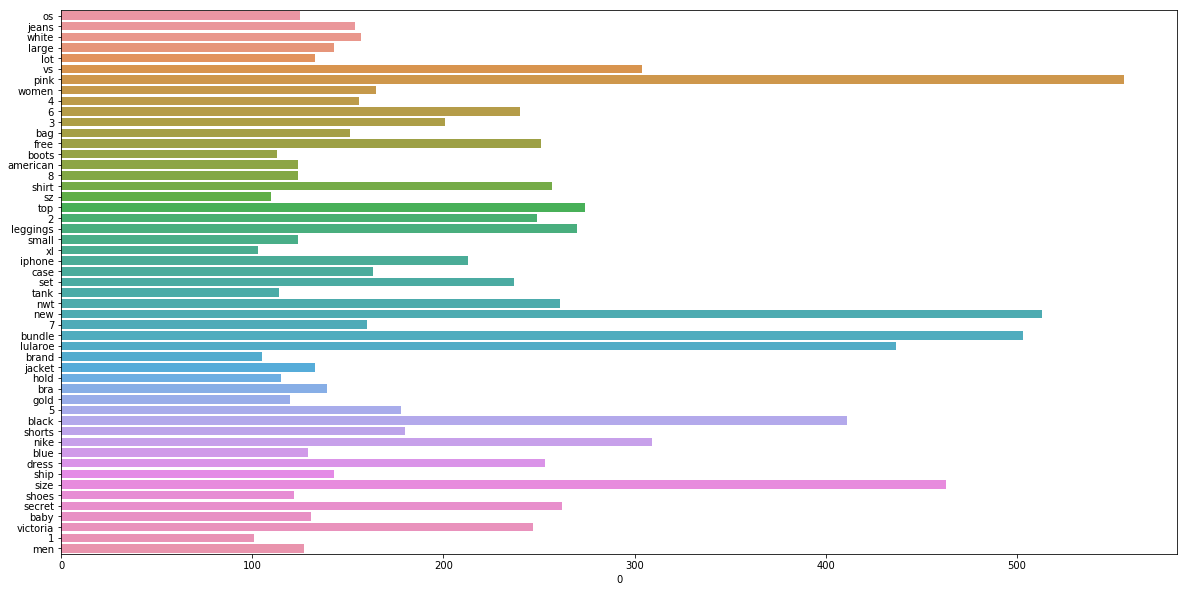

In [50]:
lop(words_name)

In [26]:
from wordcloud import WordCloud

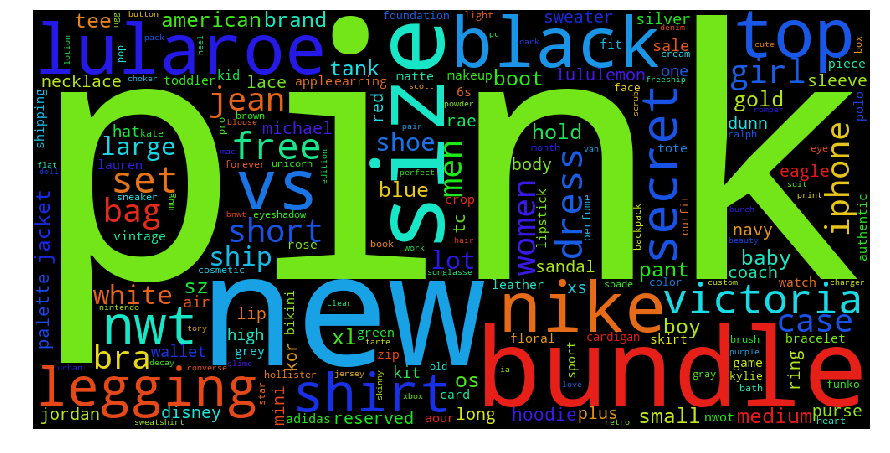

In [48]:

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words_name))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### description field

In [31]:
def lo(name):
    freq_dist = nltk.FreqDist(name)
    freq = pd.DataFrame.from_dict(freq_dist,orient='index')
    freq_greater_then_50 = freq[freq[0] > 350]
    index = freq_greater_then_50.index
    plt.figure(figsize=(20,10))
    #sns.barplot(0,index,data=freq_greater_then_50)
    
    return sns.barplot(0,index,data=freq_greater_then_50)

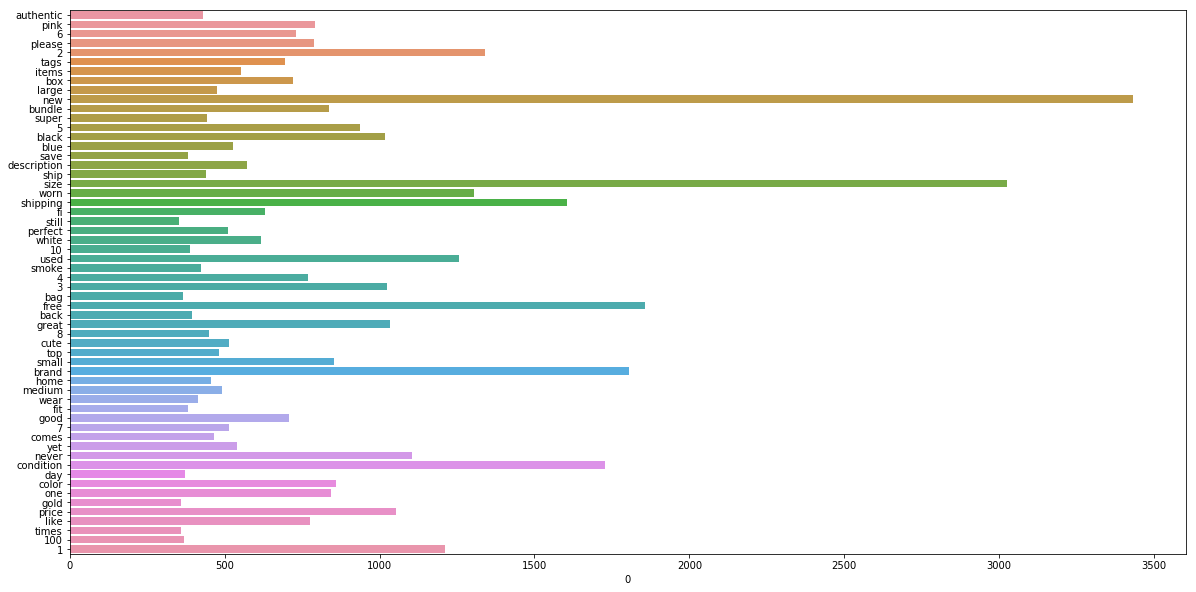

In [58]:
lo(words_description)

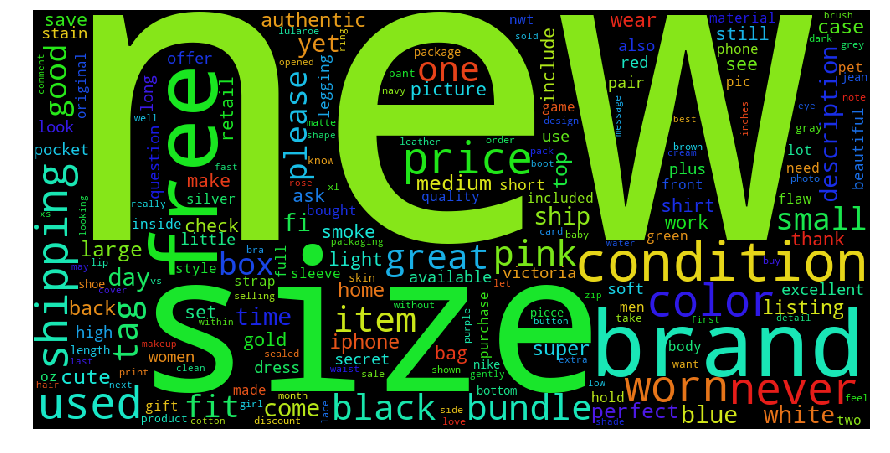

In [27]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words_description))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### category_names

In [32]:
words_category_name =[]
for i in data['category_name']:
    for x in i.split(','):
        words_category_name.append(x)

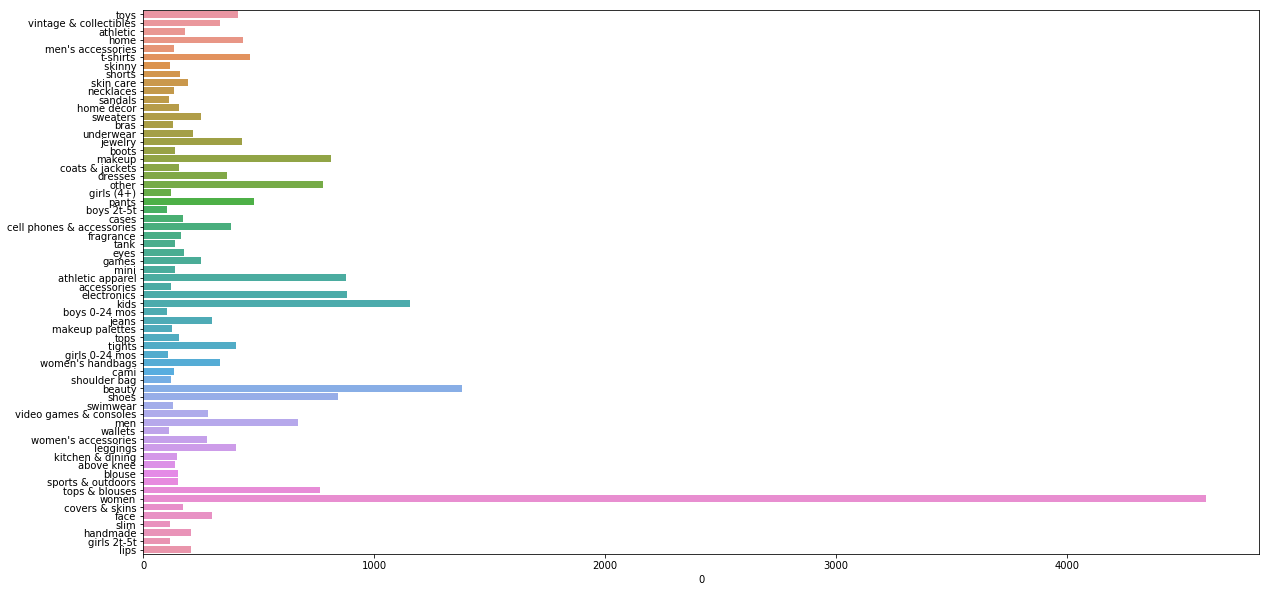

In [33]:
lop(words_category_name)

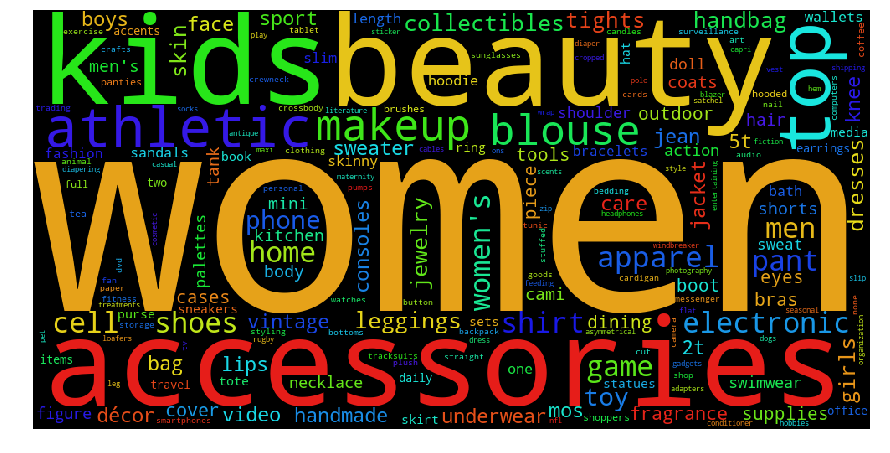

In [34]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words_category_name))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### topic modeling usind Latent Dirichlet Allocation (LDA)

In [27]:
import gensim.corpora;
from gensim.models import ldamodel

C:\Users\amogh\Anaconda2\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [41]:
num_topic = 10

In [45]:
id2words = gensim.corpora.Dictionary(words_tokens_des)
corpus = [id2words.doc2bow(text) for text in words_tokens_des]
lda = ldamodel.LdaModel(corpus=corpus,id2word=id2words,num_topics=num_topic)
def lda_x(model,n_topics):
    word_dict ={}
    word_dict1 ={}
    for i in range(n_topics):
        word = model.show_topic(i,topn=20)
        word_dict['topic '+'{}'.format(i+1)]= [i for i in word]
        #word_dict1['topic '+'{}'.format(i+1)]= [i[1] for i in word]
    return pd.DataFrame(word_dict)


In [46]:
lda_x(lda,3)

,topic 1,topic 2,topic 3
0,"(new, 0.0197075)","(new, 0.0429472)","(size, 0.0243074)"
1,"(brand, 0.0115775)","(brand, 0.0278585)","(pink, 0.0133406)"
2,"(used, 0.0098136)","(size, 0.0161289)","(cute, 0.00969541)"
3,"(price, 0.00838628)","(shipping, 0.0106499)","(secret, 0.00891473)"
4,"(box, 0.00820478)","(tags, 0.0105371)","(victoria, 0.00821022)"
5,"(size, 0.00795571)","(bag, 0.00930273)","(top, 0.00800515)"
6,"(please, 0.00790441)","(free, 0.00900954)","(small, 0.00744384)"
7,"(never, 0.00683402)","(never, 0.00822343)","(condition, 0.00735958)"
8,"(shipping, 0.00649912)","(color, 0.00733342)","(medium, 0.00704011)"
9,"(great, 0.00641262)","(small, 0.00718047)","(super, 0.0070118)"


## Countvectorizer and TFIDF 

In [26]:
import string

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
cv = CountVectorizer(stop_words= [string.punctuation])

In [94]:
# category_name

In [95]:
train = cv.fit(data['category_name'])

In [96]:
train_fit = pd.DataFrame(train.transform(data['category_name']).todense(),columns=train.get_feature_names())

In [97]:
# brand name

In [98]:
train = cv.fit(data['brand_name'])
train_brand_name = pd.DataFrame(train.transform(data['category_name']).todense(),columns=train.get_feature_names())

In [99]:
# descriotion_tags

In [130]:
tf = TfidfVectorizer(min_df=3,stop_words= [string.punctuation])

In [101]:
train = tf.fit(data['item_description_tags'])

In [102]:
train_fit_description = pd.DataFrame(train.transform(data['item_description_tags']).todense(),columns=train.get_feature_names())

In [103]:
# tag name

In [104]:
tf = TfidfVectorizer(min_df=2,stop_words= [string.punctuation])

In [105]:
train = tf.fit(data['tag_name'])

In [106]:
train_fit_name= pd.DataFrame(train.transform(data['tag_name']).todense(),columns=train.get_feature_names())

In [107]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'tag_name',
       'item_description_tags'],
      dtype='object')

In [108]:
data_train = pd.concat([train_fit,train_fit_description,train_fit_name,train_brand_name],axis = 1)

In [109]:
data_p = pd.concat([one_hot,one_ship],axis=1)
                                                                   

In [110]:
train =np.hstack((data_train,data_p))

## ML Modeling

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
y =np.log1p(data['price'])

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(train,y,train_size=0.8,test_size=0.2)

In [44]:
import numpy as np
def rmsle(y_true,y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

In [48]:
from sklearn.metrics import mean_squared_error

 Random forests or random decision forests[1][2] are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of over fitting  to their training set.

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
regression = RandomForestRegressor(n_jobs=-1,n_estimators=40,max_features=0.5,min_samples_leaf=5)

In [142]:
regression.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [143]:
y_pred = regression.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.62039318685137657

In [140]:
# single tree
pred = np.stack(t.predict(X_test) for t in regression.estimators_)
np.mean(pred[:,1]),np.std(pred[:,1])

(3.2948436686887788, 0.54918053945779854)

In [173]:
Y_test[0:1]

3582    49.0
Name: price, dtype: float64

In [202]:
#regression.score(X_train,Y_train)

In [118]:
#gradiant boosting

Gradient boosting is a ML technique for regression and classification problems, which produces a prediction model in the form of an ensenble of weak prediction models, typically decision tree.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import GridSearchCV


In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
regression = GradientBoostingRegressor(n_estimators=50)

In [123]:
regression.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [124]:
y_pred = regression.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.6537430390872176

In [120]:
# ridges regression

In [55]:
from sklearn.model_selection import KFold

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [57]:
params = {'alpha':[1,1.2,1.4,1.6,1.8,2],
         'solver': [ 'lsqr', 'sparse_cg', 'sag', 'saga','auto']
        }

In [58]:
KFOLD = KFold(n_splits=3)

In [60]:
from sklearn.metrics import make_scorer
#scoring = {'accuracy': make_scorer(mean_squared_error)

In [63]:
train_cross = GridSearchCV(regression,param_grid=params,cv=KFOLD,n_jobs=-1)

In [64]:
train_cross.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1, 1.2, 1.4, 1.6, 1.8, 2], 'solver': ['lsqr', 'sparse_cg', 'sag', 'saga', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
train_cross.best_estimator_

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='saga', tol=0.001)

In [66]:
y_pred = train_cross.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.5778413788115121

In [46]:
## xgboost

its type of gradient boosting but is scalable and reduces the over fitting  and performs better then GBM 

In [47]:
import xgboost

In [48]:
from xgboost import XGBRegressor

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [71]:

#KFOLD = KFold(n_splits=3,shuffle=True)

In [116]:
xg = XGBRegressor(n_jobs=-1,learning_rate=0.4,max_depth=6)

In [117]:
xg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
y_pred = xg.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.594048692374888